In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
movies = pd.read_csv("movies.csv")
credits = pd.read_csv("credits.csv")

In [3]:
print(movies.columns) 
print('\n')
print(credits.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [4]:
df = movies.merge(credits , on = 'title' , how = 'inner')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


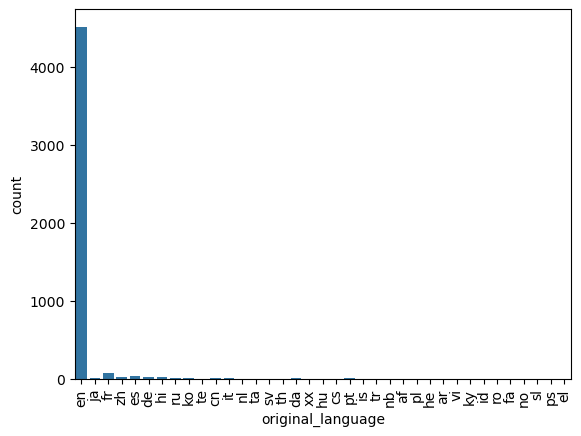

In [5]:
sns.countplot(data = df , x = df['original_language'])
plt.xticks(rotation = 90)
plt.show()

In [6]:
df['status'].value_counts()

status
Released           4801
Rumored               5
Post Production       3
Name: count, dtype: int64

In [7]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [8]:
cols_to_drop = ['budget' , 'homepage' , 'original_language' , 'original_title' , 'production_companies' , 'production_countries' , 
                'spoken_languages' , 'status' , 'tagline' , 'movie_id' ]

full_df = df.copy()

In [9]:
df = df.drop(cols_to_drop , axis = 1)
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
df.isnull().sum()

genres          0
id              0
keywords        0
overview        3
popularity      0
release_date    1
revenue         0
runtime         2
title           0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

In [11]:
len(df)

4809

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

genres          0
id              0
keywords        0
overview        0
popularity      0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
type(movies['genres'][0])

str

In [17]:
def convert(genre):
    li = []
    for i in ast.literal_eval(genre):
        li.append(i['name'])
    return li

convert(movies['genres'][0])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [18]:
df['genres'] = df['genres'].apply(convert)
df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4805, dtype: object

In [19]:
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [21]:
df['keywords']=df['keywords'].apply(convert)
df['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [22]:
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [24]:
#taking the top n cast members for our model

n = 5  # 5 for our model
def convert_cast(cast):
    global n
    li = []
    count = 0
    for i in ast.literal_eval(cast):
        count += 1
        li.append(i['name'])
        if count >= n:
            break
    return li

convert_cast(df['cast'][0])

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [25]:
df['cast'] = df['cast'].apply(convert_cast)

In [26]:
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [28]:
def convert_crew(crew):
    li = []
    for i in ast.literal_eval(crew):
        if i['job'] == 'Producer' or i['job'] == 'Director':
            li.append(i['name'])
    return list(set(li))

convert_crew(df['crew'][99])

['Rob Cohen', 'Neal H. Moritz']

In [29]:
df['crew'] = df['crew'].apply(convert_crew)
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Jon Landau, James Cameron]"
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Pat Sandston, Chad Oman, Peter Kohn, Eric McL..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, Michael G. Wilson, Barbara Broccoli]"
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Emma Thomas, Christopher Nolan]"
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Jim Morris, Colin Wilson, Andrew Stanton, Lin..."


In [30]:
#converting overview to a list so that can be easily merged with other list cols
df['overview'] = df['overview'].apply(lambda x : x.split())

In [31]:
#need to remove black spaces from the words 
remove_blanks_cols = ['cast' , 'crew' , 'genres' , 'keywords']
for i in remove_blanks_cols:
    df[i] = df[i].apply(lambda x : [i.replace(' ' , "") for i in x])
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JonLandau, JamesCameron]"
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[PatSandston, ChadOman, PeterKohn, EricMcLeod,..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, MichaelG.Wilson, BarbaraBroccoli]"
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, EmmaThomas, ChristopherNolan]"
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[JimMorris, ColinWilson, AndrewStanton, Lindse..."


In [32]:
#making a tags col which will merge all the cols which gives description of the movie
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JonLandau, JamesCameron]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[PatSandston, ChadOman, PeterKohn, EricMcLeod,...","[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, MichaelG.Wilson, BarbaraBroccoli]","[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, EmmaThomas, ChristopherNolan]","[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[JimMorris, ColinWilson, AndrewStanton, Lindse...","[John, Carter, is, a, war-weary,, former, mili..."


In [33]:
#converting tags column to string
df['tags'] = df['tags'].apply(lambda x : " ".join(x))
df['tags'] = df['tags'].apply(lambda x : x.lower())
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JonLandau, JamesCameron]","in the 22nd century, a paraplegic marine is di..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[PatSandston, ChadOman, PeterKohn, EricMcLeod,...","captain barbossa, long believed to be dead, ha..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, MichaelG.Wilson, BarbaraBroccoli]",a cryptic message from bond’s past sends him o...
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, EmmaThomas, ChristopherNolan]",following the death of district attorney harve...
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[JimMorris, ColinWilson, AndrewStanton, Lindse...","john carter is a war-weary, former military ca..."


In [34]:
#convert release_date to date-time object
df['release_date'] = pd.to_datetime(df['release_date'] , errors = 'coerce')
df.head()

,genres,id,keywords,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JonLandau, JamesCameron]","in the 22nd century, a paraplegic marine is di..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[PatSandston, ChadOman, PeterKohn, EricMcLeod,...","captain barbossa, long believed to be dead, ha..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, MichaelG.Wilson, BarbaraBroccoli]",a cryptic message from bond’s past sends him o...
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, EmmaThomas, ChristopherNolan]",following the death of district attorney harve...
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[JimMorris, ColinWilson, AndrewStanton, Lindse...","john carter is a war-weary, former military ca..."


In [35]:
req_df = df.copy()

In [36]:
#dropping the used description cols 
df = df.drop(['overview' , 'genres' , 'keywords' , 'cast' , 'crew'], axis=1)
df.head()

,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags
0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"in the 22nd century, a paraplegic marine is di..."
1,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"captain barbossa, long believed to be dead, ha..."
2,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,a cryptic message from bond’s past sends him o...
3,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,following the death of district attorney harve...
4,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"john carter is a war-weary, former military ca..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4805 non-null   int64         
 1   popularity    4805 non-null   float64       
 2   release_date  4805 non-null   datetime64[ns]
 3   revenue       4805 non-null   int64         
 4   runtime       4805 non-null   float64       
 5   title         4805 non-null   object        
 6   vote_average  4805 non-null   float64       
 7   vote_count    4805 non-null   int64         
 8   tags          4805 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 504.4+ KB


In [38]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    tokens = []
    for i in text.split():
        tokens.append(lemmatizer.lemmatize(i))
    return " ".join(tokens)

In [39]:
lemmatize_words(df['tags'][0])

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following order and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez jonlandau jamescameron'

In [40]:
df['tags'] = df['tags'].apply(lemmatize_words)
df.head()

,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags
0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"in the 22nd century, a paraplegic marine is di..."
1,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"captain barbossa, long believed to be dead, ha..."
2,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,a cryptic message from bond’s past sends him o...
3,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,following the death of district attorney harve...
4,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"john carter is a war-weary, former military ca..."


In [41]:
vectorizer = TfidfVectorizer(stop_words = 'english' , ngram_range = (1,3) , max_features = 5000)

In [42]:
tags_array = vectorizer.fit_transform(df['tags']).toarray()

In [43]:
# Store each row's TF-IDF vector as a list in a new column
df['tags_vector'] = tags_array.tolist()
df.head()

,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags,tags_vector
0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"in the 22nd century, a paraplegic marine is di...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"captain barbossa, long believed to be dead, ha...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,a cryptic message from bond’s past sends him o...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,following the death of district attorney harve...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"john carter is a war-weary, former military ca...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [44]:
df.drop('tags' , axis = 1  , inplace = True)

In [45]:
df.head()

,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags_vector
0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4805 non-null   int64         
 1   popularity    4805 non-null   float64       
 2   release_date  4805 non-null   datetime64[ns]
 3   revenue       4805 non-null   int64         
 4   runtime       4805 non-null   float64       
 5   title         4805 non-null   object        
 6   vote_average  4805 non-null   float64       
 7   vote_count    4805 non-null   int64         
 8   tags_vector   4805 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 504.4+ KB


In [47]:
df.to_csv("preprocessed_data.csv")